# Explore Weather Trends

Author: Julio Uribe

In this project we'll be looking at weather trends comparing global temperature data (C) vs San Francisco temperature data (C), where I'm currently living. I decided to go with Jupyter notebook and Python to do this project because it's been a while since I've used Python on a regular basis and why not jump back into it with first DAND project.

I retrieved csv data by using a few SQL queries on Udacity's site. I used the following queries for the different data sets.

Global Data Set  
SELECT *  
FROM global_data

San Francisco Data Set  
SELECT *  
FROM city_data  
WHERE city = 'San Francisco'

Next step is to load the data and start getting familiar with the data we have so we'll look at head and make sure our data is loading properly. We'll also load a few libraries we'll use at some point. We will make a graph so we'll import matplotlib and seaborn. We'll use pandas and numpy to play with our data.

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sf_data = pd.read_csv('San Francisco Averages.csv')
global_data = pd.read_csv('Global Averages.csv')

sf_data.tail()
#sf_data.head()

,year,city,country,avg_temp
160,2009,San Francisco,United States,15.02
161,2010,San Francisco,United States,14.67
162,2011,San Francisco,United States,14.50
163,2012,San Francisco,United States,15.05
164,2013,San Francisco,United States,16.23


We'll take a peek at global data as well in a separate cell since we can only display one table at a time. I'm also looking at tail data to get an idea of where each data set year starts and ends.

In [3]:
global_data.tail()
#global_data.head()


,year,avg_temp
261,2011,9.52
262,2012,9.51
263,2013,9.61
264,2014,9.57
265,2015,9.83


From our observations, San Francisco data starts at 1849 and ends at 2013 while global data starts at 1750 and ends at 2015. We have more global data so we'll slice our global data set so that we only compare for years where we have data points for both data sets.

In [4]:
global_sliced = global_data[(global_data.year >=1849) & (global_data.year <= 2013)]

print "Start year for this data set is {}. End year is {}".format(int(global_sliced.iloc[0][0]), int(global_sliced.iloc[(len(global_sliced) - 1)][0]))
global_sliced.tail()

Start year for this data set is 1849. End year is 2013


,year,avg_temp
259,2009,9.51
260,2010,9.70
261,2011,9.52
262,2012,9.51
263,2013,9.61


Now that we have comparable year range for the two data sets let's go ahead and start getting some moving averages to plot.

The function below will be used to calcuate a moving average for our entire data frame. We'll enter the dataframe we want, the date range, and the position for our 'avg_temp' column depending on the dataframe.

In [15]:
def moving_average_iloc(my_df, date_range, col_num):
    mavg = []
    for i in range(len(my_df)):
        if i >= date_range:
            total = 0
            for j in range(date_range):
                total = total + my_df.iloc[i-j][col_num]
            mavg.append(total/float(date_range))
        else:
            mavg.append(np.nan)
    my_df['moving_average'] = mavg


Now we run our dataframes through the function we defined above. This should create a new column with a moving average. I'm using a moving average 10 years at a time. This should be large enough for our 150 year period we're looking at and it's reasonable to look at things a decade at a time, we'll still have a moving average data point for every year.

I'm also print out my dataframes to make sure the new column was created properly and the numbers look right. I made my function insert NaN values for the first 9 points before we can start calculating a moving average. Global data after slicing is directly below

In [16]:
by_decade = 10
moving_average_iloc(sf_data, by_decade, 3) # 3 is to grab the right column for avg_temp
moving_average_iloc(global_sliced, by_decade, 1) # is to grab the right col for avg_temp


global_sliced

,year,avg_temp,moving_average
99,1849,7.98,NaN
100,1850,7.90,NaN
101,1851,8.18,NaN
102,1852,8.10,NaN
103,1853,8.04,NaN
104,1854,8.21,NaN
105,1855,8.11,NaN
106,1856,8.00,NaN
107,1857,7.76,NaN
108,1858,8.10,NaN


Now we'll make sure our SF data looks right as well.

In [7]:
sf_data

,year,city,country,avg_temp,moving_average
0,1849,San Francisco,United States,14.12,NaN
1,1850,San Francisco,United States,13.80,NaN
2,1851,San Francisco,United States,14.39,NaN
3,1852,San Francisco,United States,13.81,NaN
4,1853,San Francisco,United States,14.40,NaN
5,1854,San Francisco,United States,13.98,NaN
6,1855,San Francisco,United States,14.20,NaN
7,1856,San Francisco,United States,14.10,NaN
8,1857,San Francisco,United States,14.78,NaN
9,1858,San Francisco,United States,14.19,NaN


Now that we have nice moving averages we can finally plot the points and get a feel if SF and the world in general is getting warmer.

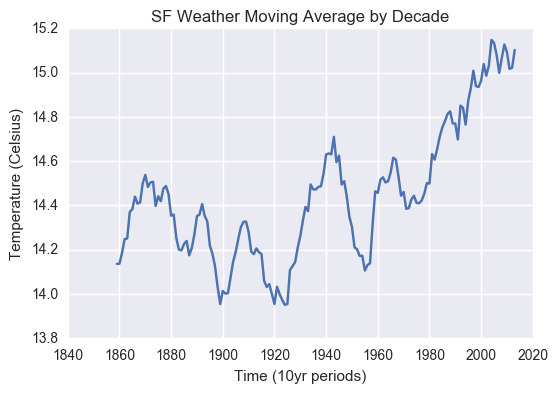

In [23]:
plt.plot('year', 'moving_average', data = sf_data)
plt.xlabel('Time (10yr periods)')
plt.ylabel('Temperature (Celsius)')
plt.title('SF Weather Moving Average by Decade')
plt.show()

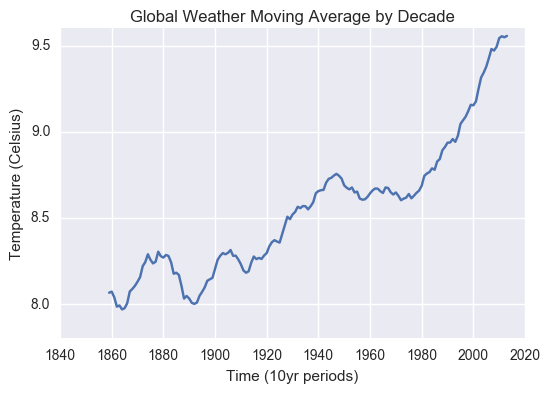

In [24]:
plt.plot('year', 'moving_average', data = global_sliced)
plt.xlabel('Time (10yr periods)')
plt.ylabel('Temperature (Celsius)')
plt.title('Global Weather Moving Average by Decade')
plt.show()

# Summary and Observations
Now that we've plotted both sets of data, we can see a general trend of average weather temperature going up. Up until the mid 1900's there is some fluctuation going on but it's not quite definitive until we hit the 1980's and see the plot shoot up. A lot of people would say global temperature generally fluctuates and they would be correct right up until the 1980's where I say the increase in average weather temperature is very clear and hard to argue. If we look at history and try to link this to our consumption of fossil fuels, the 1980's is a time when cars truly became widespread. The 1950's saw more cars in typical atomic families but by the 1980's there were muscles cars, sports cars, wagons, trucks, etc. They had become incorporated very closely to American families and made their way into other parts of the world. I'd be interested in reading more about manufacturing in New York and Beijing because this was also around the time that both New York and Beijing has huge problems with smog in their cities. New York chose to make changes and set new policies to address the smog while Beijing let the problem continue. Fast forward 30 years and the New York sky is beautiful and blue again mean while Beijing is still fairly smogy while they begin to address things. I'm not sure what caused all the smog in the 1980's for both those cities but I'm sure it's related to our environmental impact which may sync up with these plots fairly well. Still, this is just correlation and we can't say anything caused the increase in temperature until we truly investigate this with the proper method.